Setup

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn import linear_model
#from plotly import tools
import numpy.random as r
#import plotly.plotly as py
#import plotly.graph_obj as go
#from keras import backend as K
#from keras.layers import Sequential
#from keras.layers import Dense
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
%matplotlib inline

In [2]:
df = pd.read_csv("qudditch_training.csv")
df.drop(["id","player_id","weight","foul_type_id","game_move_id","penalty_id","player_code","move_speciality","snitchnip",
         "checking","dopplebeater_defence","hawkshead_attacking_formation","no_hands_tackle","power_play","spiral_dive",
         "starfish_and_stick","twirl","wronski_feint","zig-zag","bludger_backbeat","chelmondiston_charge",
         "dionysus_dive","double_eight_loop","finbourgh_flick","parkins_pincer","plumpton_pass","porskoff_ploy",
         "transylvanian_tackle","woollongong_shimmy"],axis=1,inplace=True)
df = (df[~pd.isnull(df).any(axis=1)])

In [3]:
Xlabels=['age', 'game_duration', 'num_game_moves',
       'num_game_losses', 'num_practice_sessions', 'num_games_satout',
       'num_games_injured', 'num_games_notpartof',
       'num_games_won', 'stooging', 'body_blow', 'sloth_grip_roll',
       'reverse_pass', 'change', 'snitch_caught',
       'gryffindor','hufflepuff','ravenclaw','slytherin','female','male',
       'beater','chaser','seeker']

In [4]:
#print(df.columns)
data = df.values
X1 = data[0:101267] # This leaves 101265 entries.

Y = data[:,-1]

#Y1 = Y1=='YES'
for i in range(len(Y)):
    if Y[i]=="NO":
        Y[i]=0.0
    elif Y[i]=="YES":
        Y[i]=1.0
        
Y=Y.astype('float')

#Y = Y.reshape((Y.shape[0],1))

gryffindor = np.zeros((X1.shape[0],1),dtype='float')
hufflepuff = np.zeros((X1.shape[0],1),dtype='float')
ravenclaw = np.zeros((X1.shape[0],1),dtype='float')
slytherin = np.zeros((X1.shape[0],1),dtype='float')

female = np.zeros((X1.shape[0],1))
male = np.zeros((X1.shape[0],1))

beater = np.zeros((X1.shape[0],1))
chaser = np.zeros((X1.shape[0],1))
seeker = np.zeros((X1.shape[0],1))

#print(X1[0])

for row in range(len(X1)):
    if X1[row][0]=="Gryffindor":
        gryffindor[row]=1.0
    elif X1[row][0]=="Hufflepuff":
        hufflepuff[row]=1.0
    elif X1[row][0]=="Ravenclaw":
        ravenclaw[row]=1.0
    elif X1[row][0]=="Slytherin":
        slytherin[row]=1.0
        
    if X1[row][1]=="Female":
        female[row]=1.0
    elif X1[row][1]=="Male":
        male[row]=1.0
        
#    if X1[row][7]=="?":
#        X1[row][7]=0;
#    else:
#        X1[row][7]=float(X1[row][7])

    if X1[row][10]=="Beater":
        beater[row]=1.0
    elif X1[row][10]=="Chaser":
        chaser[row]=1.0
    elif X1[row][10]=="Seeker":
        seeker[row]=1.0
        
    if X1[row][12]=="Norm":
        X1[row][12]=1.0
    elif X1[row][12]==">7":
        X1[row][12]=2.0
    elif X1[row][12]==">8":
        X1[row][12]=3.0
    elif X1[row][12]=="None":
        X1[row][12]=0.0
    
    if X1[row][13]=="No":
        X1[row][13]=0.0
    elif X1[row][13]=="Down":
        X1[row][13]=1.0
    elif X1[row][13]=="Steady":
        X1[row][13]=2.0
    elif X1[row][13]=="Up":
        X1[row][13]=3.0
        
    if X1[row][14]=="No":
        X1[row][14]=0.0
    elif X1[row][14]=="Down":
        X1[row][14]=1.0
    elif X1[row][14]=="Steady":
        X1[row][14]=2.0
    elif X1[row][14]=="Up":
        X1[row][14]=3.0
        
    if X1[row][15]=="No":
        X1[row][15]=0.0
    elif X1[row][15]=="Down":
        X1[row][15]=1.0
    elif X1[row][15]=="Steady":
        X1[row][15]=2.0
    elif X1[row][15]=="Up":
        X1[row][15]=3.0
        
    if X1[row][-2]=="No":
        X1[row][-2]=0.0
    elif X1[row][-2]=="Yes":
        X1[row][-2]=1.0

    if X1[row][-3]=="No":
        X1[row][-3]=0.0
    elif X1[row][-3]=="Ch":
        X1[row][-3]=1.0
        
print(df.columns[18])
#X1[:,-2] = X1[:,-2]=="Yes"
#X1[:,-3] = X1[:,-3]=="Ch"

#print(X1[0])

X1 = np.hstack((X1,gryffindor,hufflepuff,ravenclaw,slytherin,female,male,beater,chaser,seeker))
#X1: [
#0'house', 
#1'gender', 
#2'age', 
#3'game_duration', 
#4'num_game_moves',
#5'num_game_losses',
#6'num_practice_sessions',
#7'num_games_satout',
#8'num_games_injured',
#9'num_games_notpartof',
#10'player_type',
#11'num_games_won',
#12'stooging',
#13'body_blow',
#14'sloth_grip_roll',
#15'reverse_pass',
#16'change',
#17'snitch_caught',
#    'quidditch_league_player'?
#18'gryffindor',
#19'hufflepuff',
#20'ravenclaw',
#21'slytherin',
#22'female',
#23'male',
#24'beater',
#25'chaser',
#26'seeker']
X = np.delete(X1,[0,1,10,18],1)

Xlables=['age', 'game_duration', 'num_game_moves',
       'num_game_losses', 'num_practice_sessions', 'num_games_satout',
       'num_games_injured', 'num_games_notpartof',
       'num_games_won', 'stooging', 'body_blow', 'sloth_grip_roll',
       'reverse_pass', 'change', 'snitch_caught',
       'gryffindor','hufflepuff','ravenclaw','slytherin','female','male',
       'beater','chaser','seeker']

row_num = 1
column_num = 1
for row in X:
    for column in row:
        if type(column) != float:
            print("DING!")
            #print("row=" + str(row_num) + "," + " column=" + str(column_num) + " data= ")
            #print(str(column) + " not float but ")
            #column = float(column)
            #print("now the val is of type: " + str(type(column)) + "\n")
        column_num += 1
    row_num += 1

X=X.astype('float')
    
#print((X[0:20]))
#print(Y[0:20])


#print(X[0:20,-6:-2])

#print(X[0:20,-2:])

Index(['house', 'gender', 'age', 'game_duration', 'num_game_moves',
       'num_game_losses', 'num_practice_sessions', 'num_games_satout',
       'num_games_injured', 'num_games_notpartof', 'player_type',
       'num_games_won', 'stooging', 'body_blow', 'sloth_grip_roll',
       'reverse_pass', 'change', 'snitch_caught', 'quidditch_league_player'],
      dtype='object')
['Gryffindor' 'Female' 11.0 1.0 41.0 0.0 1.0 0.0 0.0 0.0 'Beater' 1.0
 'None' 'No' 'No' 'No' 'No' 'No' 0.0]
quidditch_league_player
['Gryffindor' 'Female' 11.0 1.0 41.0 0.0 1.0 0.0 0.0 0.0 'Beater' 1.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0]
[[ 11.    1.   41.    0.    1.    0.    0.    0.    1.    0.    0.    0.
    0.    0.    0.    1.    0.    0.    0.    1.    0.    1.    0.    0. ]
 [ 12.    3.   59.    0.   18.    0.    0.    0.    9.    0.    0.    0.
    3.    1.    1.    1.    0.    0.    0.    1.    0.    1.    0.    0. ]
 [ 13.    2.   11.    5.   13.    2.    0.    1.    6.    0.    0.    2.
    0.    0.    1.    0.  

In [5]:
X_scale = preprocessing.scale(X)

In [6]:
Xp=preprocessing.PolynomialFeatures(degree=2)

In [7]:
trainX,testX,trainY,testY=train_test_split(X_scale,Y,test_size=0.3)

In [8]:

trainXpoly=Xp.fit_transform(trainX)
testXpoly=Xp.fit_transform(testX)
print(len(trainX[0]))
print(len(trainXpoly[0]))

24
325


Unsupervised Analysis

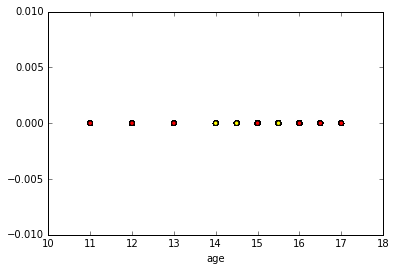

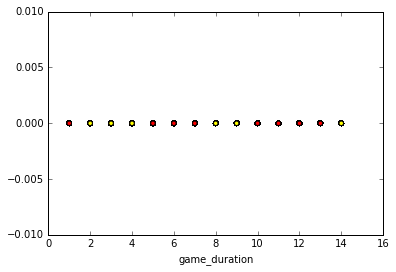

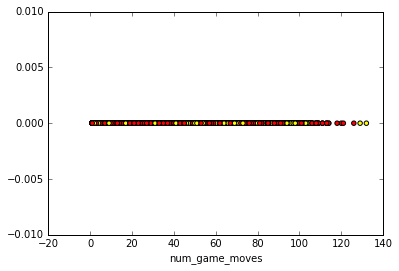

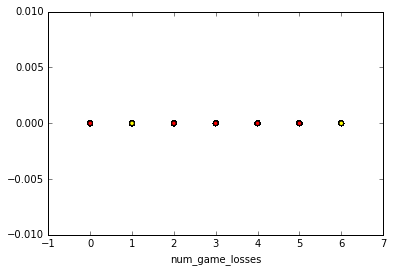

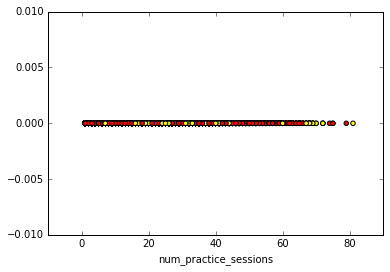

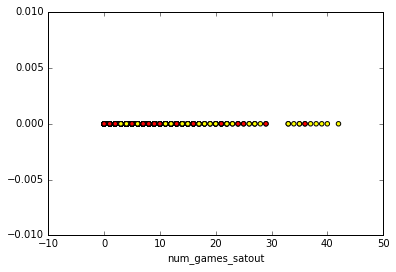

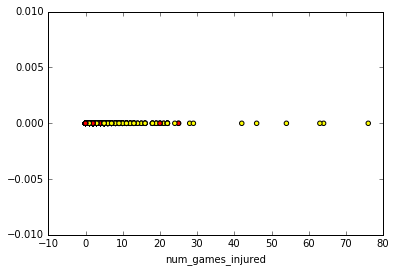

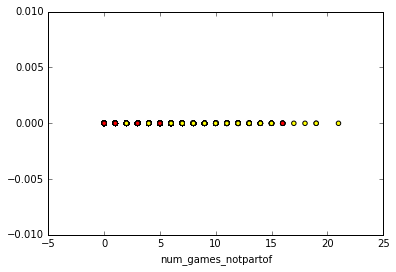

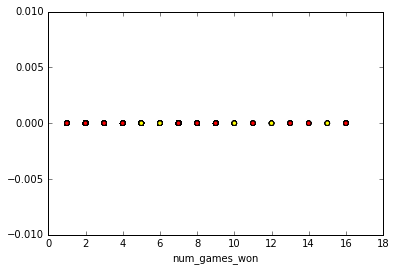

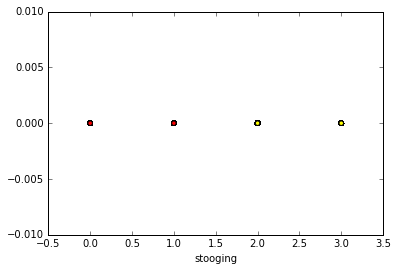

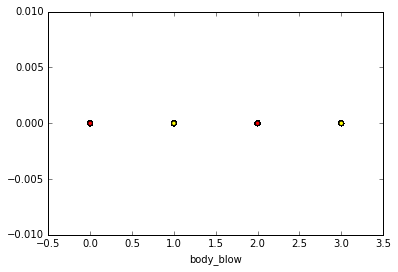

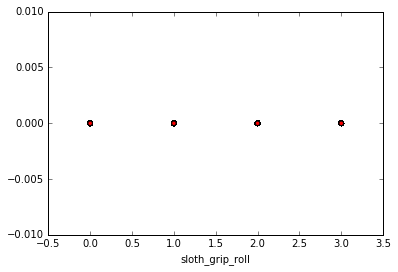

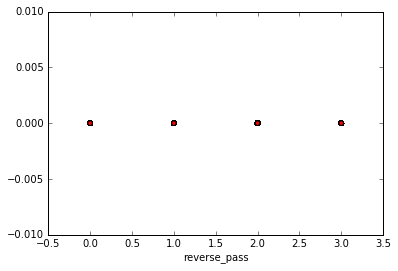

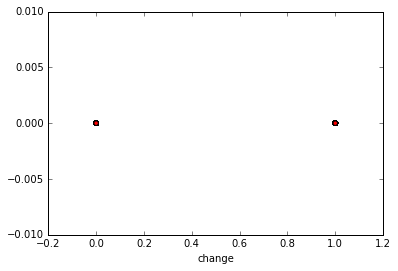

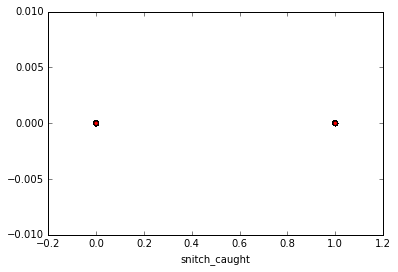

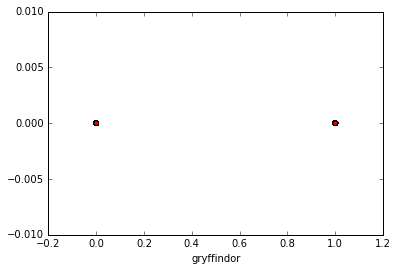

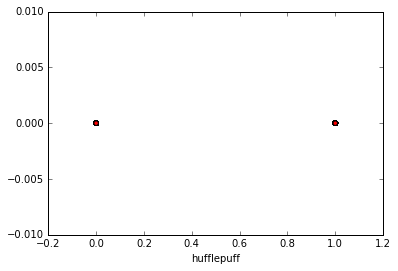

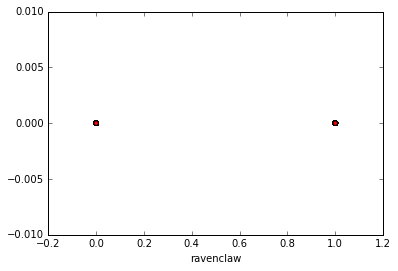

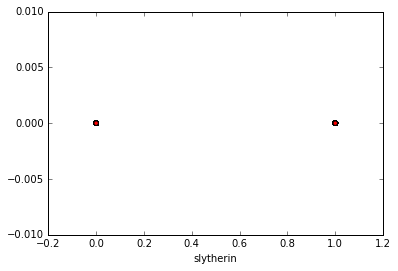

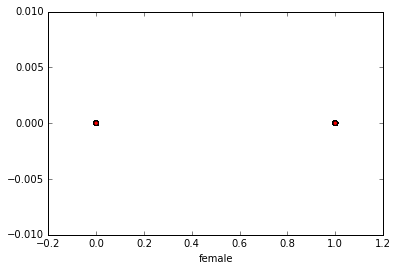

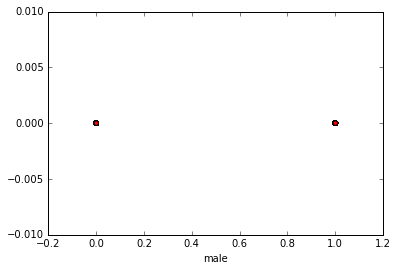

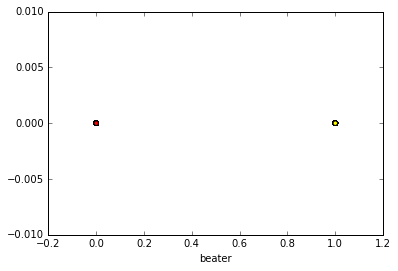

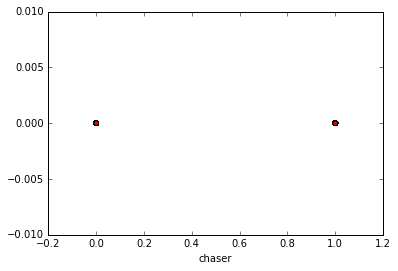

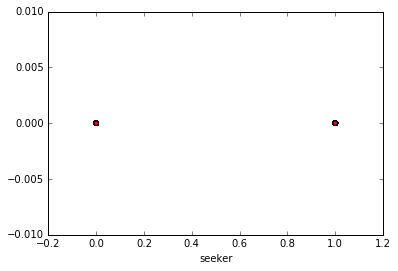

In [60]:
# Unsupervised Analysis
# Plot every x parameter with y

for i in range(24):
    #fig=plt.subplot(24,1,i+1)
    plt.xlabel(Xlabels[i])
    plt.scatter(X[:,i],len(X)*[0],c=Y,cmap="autumn")
    plt.show()

# We gotta change this so that every pair of features are plotted in subplots.

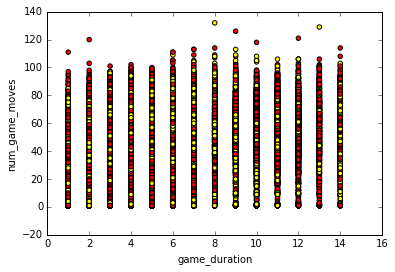

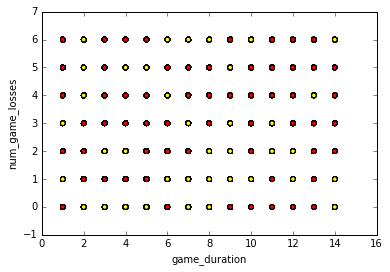

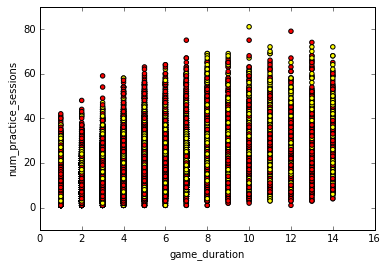

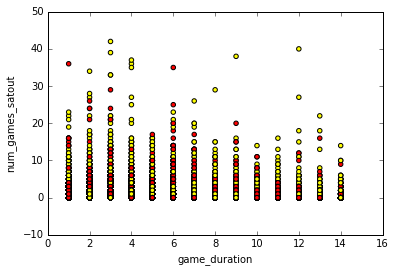

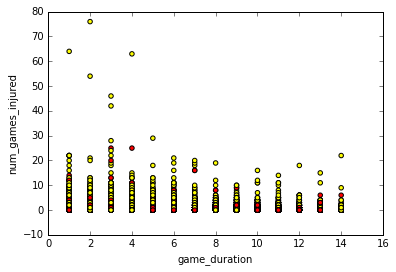

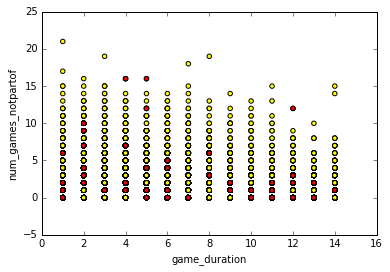

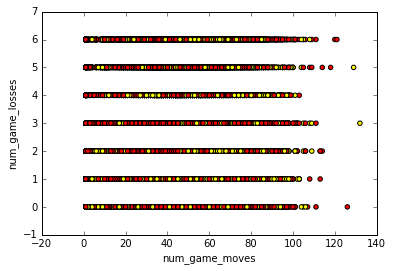

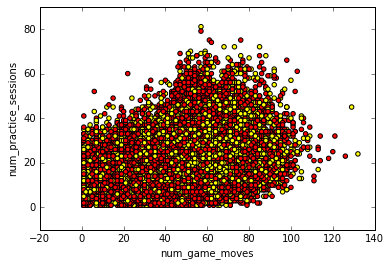

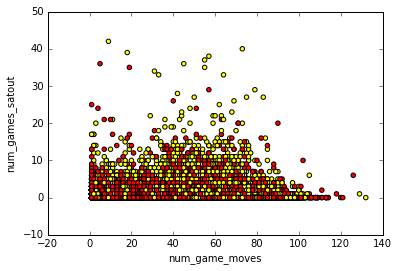

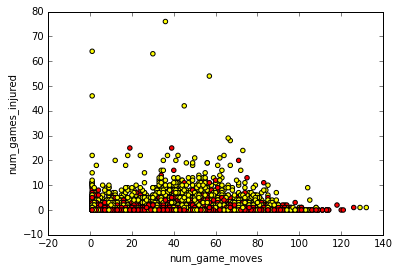

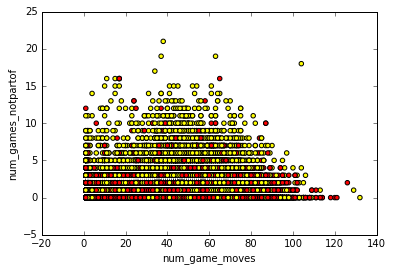

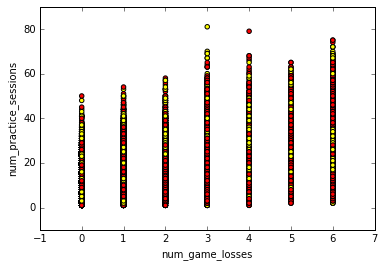

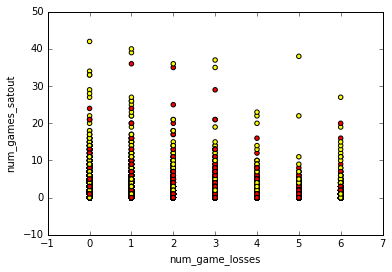

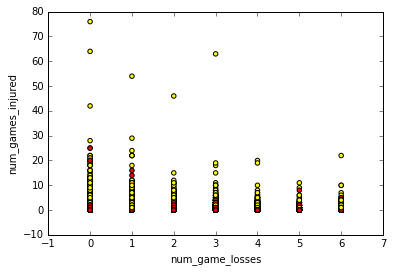

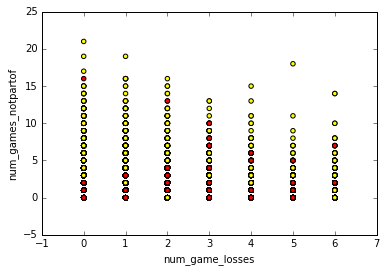

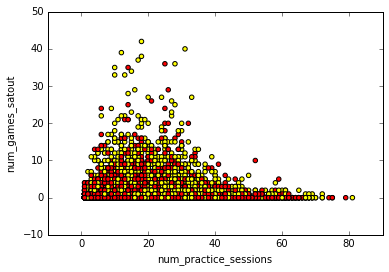

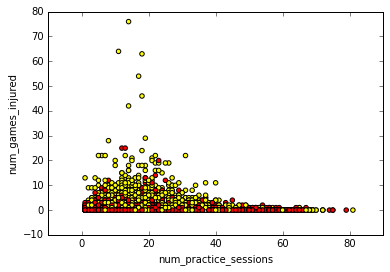

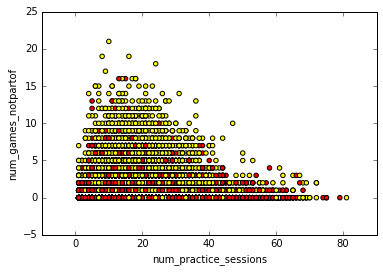

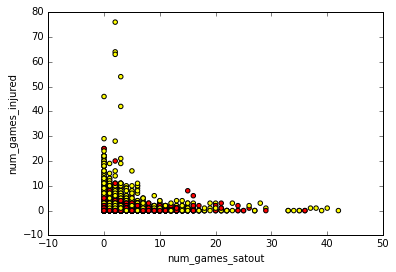

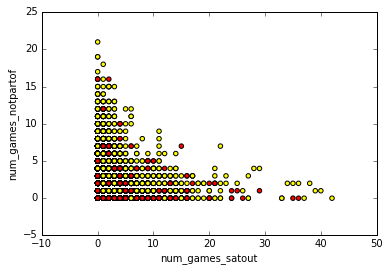

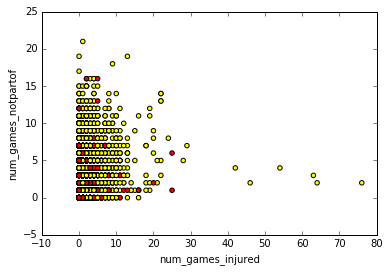

In [10]:
# Plot every pair of x parameters with y

# We gotta change this so that every pair of features are plotted in subplots.
[1,2,3,4,5,6,7]
for i in range(7):
    for j in range(i+1,7):
        #fig = plt.subplot(276,1,i+1)
        plt.xlabel(Xlabels[i+1])
        plt.ylabel(Xlabels[j+1])
        plt.scatter(X[:,i+1],X[:,j+1],c=Y,cmap='autumn')
        plt.show()

Logistic Regression

In [1]:
Y

NameError: name 'Y' is not defined

In [25]:
# Variations:
# Regularization (use L1 and L2)
# Polynomial transformation
# c values

acc_train_logreg = []
acc_test_logreg = []
c_logreg = []
def logreg_model(c , X_train, Y_train, X_test, Y_test,reg=None, max_iter=200):
    if reg=="LASSO" or reg=="Lasso" or reg=="lasso" or reg=="l2" or reg==None:
        logreg = linear_model.LogisticRegression(C=c,penalty='l2', warm_start=True, solver='saga')
    elif reg=="Ridge" or reg=="ridge" or reg=="l1":
        logreg = linear_model.LogisticRegression(C=c,penalty='l1', warm_start=True, solver='saga')
    
    logreg.fit(X_train, Y_train)
    Yhat_train = logreg.predict(X_train)
    
    acc_train = np.mean(Yhat_train == Y_train)
    acc_train_logreg.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)
    
    Yhat_test = logreg.predict(X_test)
    
    acc_test = np.mean(Yhat_test == Y_test)
    acc_test_logreg.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)
    
    tpTest=0
    tnTest=0
    fpTest=0
    fnTest=0
    
    for i in range(len(Y_test)):
        if Y_test[i]==1:
            if Yhat_test[i]==1:
                tpTest+=1
            else:
                fnTest+=1
        else:
            if Yhat_test[i]==0:
                tnTest+=1
            else:
                fpTest+=1
                
    print("True+: " + str(tpTest) + ", True-: " + str(tnTest) + ", False+: " + str(fpTest) + "False-: " + str(fnTest))

    # Appending value of c for graphing purposes\n",
    c_logreg.append(c)
    #print(logreg.coef_)
    #print(logreg.intercept_)

In [17]:
clist = [0.001,0.01,0.1,1,10,100]

In [21]:
print(type(trainY[0]))
for c in clist:
    logreg_model(c,trainX,trainY,testX,testY,'LASSO')

<class 'numpy.float64'>
Accuracy on training data = 0.617668
Accuracy on test data = 0.621099
True+: 5566, True-: 13303, False+: 3143False-: 8368
[[ 0.02987059  0.04174862  0.03728469 -0.07336688  0.00163585  0.09452382
   0.18595389  0.43021281  0.1378954  -0.01914995 -0.05256237  0.01736682
  -0.0405891   0.04232138  0.10934069  0.09937087  0.0131412  -0.01421743
   0.07084085  0.01377143 -0.01265391  0.08488157 -0.04225231  0.00968818]]
[-0.13912986]
Accuracy on training data = 0.617950
Accuracy on test data = 0.622054
True+: 5651, True-: 13247, False+: 3199False-: 8283
[[ 0.03072241  0.04300799  0.03875001 -0.07423723 -0.00204139  0.09664825
   0.20497687  0.46548827  0.14228433 -0.01868041 -0.05711576  0.01648825
  -0.05126749  0.04526738  0.121122    0.14313571  0.02753404 -0.00720655
   0.11146593  0.01690489 -0.00991428  0.09028138 -0.04353846  0.01208903]]
[-0.13576613]


C:\Users\Rafi\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.617922
Accuracy on test data = 0.621922
True+: 5659, True-: 13235, False+: 3211False-: 8275
[[ 0.03084494  0.04312832  0.03892893 -0.07427543 -0.00247402  0.09683427
   0.20721357  0.46943155  0.14268954 -0.01860526 -0.05764865  0.01636643
  -0.05250793  0.04562407  0.12250148  0.15045357  0.02998413 -0.00593637
   0.11830871  0.02631408 -0.00052346  0.09087729 -0.04365943  0.0123656 ]]
[-0.135382]
Accuracy on training data = 0.617879
Accuracy on test data = 0.621922
True+: 5661, True-: 13233, False+: 3213False-: 8273
[[ 0.03085787  0.04314013  0.03894728 -0.07427855 -0.002518    0.0968525
   0.2074412   0.46983044  0.14272932 -0.01859738 -0.05770296  0.01635392
  -0.05263392  0.04566061  0.12264188  0.15123573  0.03024648 -0.00579956
   0.11904067  0.02857998  0.00174099  0.09093757 -0.04367138  0.01239373]]
[-0.13534324]
Accuracy on training data = 0.617879
Accuracy on test data = 0.621922
True+: 5661, True-: 13233, False+: 3213False-: 8273
[[ 0.03085914

In [ ]:
print 

In [22]:
for c in clist:
    logreg_model(c,trainX,trainY,testX,testY,'Ridge')

Accuracy on training data = 0.613901
Accuracy on test data = 0.616557
True+: 4975, True-: 13756, False+: 2690False-: 8959
[[ 0.          0.          0.         -0.01074255  0.          0.04709951
   0.08803618  0.41421363  0.11792498  0.          0.          0.          0.
   0.          0.05098021  0.          0.          0.          0.          0.
   0.          0.03854568  0.          0.        ]]
[-0.14235793]
Accuracy on training data = 0.617809
Accuracy on test data = 0.621198
True+: 5516, True-: 13356, False+: 3090False-: 8418
[[ 0.02742898  0.03644651  0.03232264 -0.06871092  0.          0.09105128
   0.19386389  0.46515363  0.14095559 -0.01127403 -0.0450214   0.01449696
  -0.03456245  0.03408522  0.10905403  0.08505886  0.00281974 -0.0111611
   0.05581784  0.0217768   0.          0.08053097 -0.04078255  0.00194215]]
[-0.13577363]
Accuracy on training data = 0.618133
Accuracy on test data = 0.621922
True+: 5645, True-: 13249, False+: 3197False-: 8289
[[ 0.03052978  0.04206889  

C:\Users\Rafi\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.617879
Accuracy on test data = 0.621922
True+: 5661, True-: 13233, False+: 3213False-: 8273
[[ 0.03085596  0.04313011  0.03894059 -0.07427624 -0.00250773  0.09684807
   0.2074523   0.46986939  0.14272964 -0.01858846 -0.05769726  0.01635115
  -0.05263105  0.045652    0.12264283  0.15124919  0.03024612 -0.00579071
   0.11905222  0.03945083  0.01261089  0.09093453 -0.04366917  0.01238724]]
[-0.13533936]
Accuracy on training data = 0.617879
Accuracy on test data = 0.621922
True+: 5661, True-: 13233, False+: 3213False-: 8273
[[ 0.03085936  0.04313973  0.03894786 -0.07427785 -0.00252105  0.09685379
   0.20746511  0.46987416  0.14273245 -0.01859577 -0.05770836  0.01635309
  -0.05264687  0.04566403  0.12265566  0.15130871  0.03027059 -0.00578619
   0.11910922  0.04268135  0.01584202  0.09094357 -0.0436723   0.0123965 ]]
[-0.13533908]


In [26]:
#Use different feature pairs
for c in clist:
    logreg_model(c,trainXpoly,trainY,testXpoly,testY,'LASSO')


C:\Users\Rafi\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.583768
Accuracy on test data = 0.586537
True+: 2185, True-: 15634, False+: 812False-: 11749
Accuracy on training data = 0.583768
Accuracy on test data = 0.586537
True+: 2187, True-: 15632, False+: 814False-: 11747
Accuracy on training data = 0.583825
Accuracy on test data = 0.586570
True+: 2186, True-: 15634, False+: 812False-: 11748
Accuracy on training data = 0.583797
Accuracy on test data = 0.586570
True+: 2186, True-: 15634, False+: 812False-: 11748
Accuracy on training data = 0.583867
Accuracy on test data = 0.586570
True+: 2186, True-: 15634, False+: 812False-: 11748
Accuracy on training data = 0.583867
Accuracy on test data = 0.586603
True+: 2188, True-: 15633, False+: 813False-: 11746


In [27]:
for c in clist:
    logreg_model(c,trainXpoly,trainY,testXpoly,testY,'Ridge')

C:\Users\Rafi\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.588226
Accuracy on test data = 0.591343
True+: 2496, True-: 15469, False+: 977False-: 11438
Accuracy on training data = 0.591259
Accuracy on test data = 0.594964
True+: 2790, True-: 15285, False+: 1161False-: 11144
Accuracy on training data = 0.591104
Accuracy on test data = 0.596643
True+: 2928, True-: 15198, False+: 1248False-: 11006
Accuracy on training data = 0.591231
Accuracy on test data = 0.596675
True+: 2938, True-: 15189, False+: 1257False-: 10996
Accuracy on training data = 0.591203
Accuracy on test data = 0.596610
True+: 2936, True-: 15189, False+: 1257False-: 10998
Accuracy on training data = 0.591245
Accuracy on test data = 0.596544
True+: 2938, True-: 15185, False+: 1261False-: 10996


Support Vector Machines

In [9]:
# Variations
# c value
# kernel
# polynomial transformation

acc_train_svm_linear = []
acc_test_svm_linear = []
c_svm_linear = []

acc_train_svm_rbf = []
acc_test_svm_rbf = []
c_svm_rbf = []

acc_train_svm_poly = []
acc_test_svm_poly = []
c_svm_poly = []

In [14]:
#use svm_kernel parameter to choose svm model type. 3 kernel options: "linear"[default], "rbf", "poly"

def svm_model(c, X_train, Y_train, X_test, Y_test, svm_kernel = "linear"):
    # TODO - Create an object of svm.SVC(probability = False, kernel = 'linear', C = c) - 5 points
    svc = svm.SVC(probability = False, kernel = svm_kernel, C = c)
    print("kernel: "+str(svm_kernel))
    print("c:{0:f}".format(c))
    
    #if svm_kernel=="poly": # Fill in the values for 
    #X_train=X_train[0:12500]
    #Y_train=Y_train[0:12500]
    #X_test=X_test[0:5300]
    #Y_test=Y_test[0:5300]
    
    # TODO - Fit the classifier on the training set - 5 points
    svc.fit(X_train, Y_train)
    
    # TODO - Find the prediction and accuracy on the training set - 5 points
    Yhat_svc_train = svc.predict(X_train)
    acc_train = np.mean(Yhat_svc_train == Y_train)
    
    # Adding testing accuracy to acc_train_svm
    if svm_kernel=="linear":
        acc_train_svm_linear.append(acc_train)
    elif svm_kernel=="rbf":
        acc_train_svm_rbf.append(acc_train)
    elif svm_kernel=="poly":
        acc_train_svm_poly.append(acc_train)
        
    print('\tTrain Accuracy = '+str(acc_train))
    
    # TODO - Find the prediction and accuracy on the test set - 5 points
    Yhat_svc_test = svc.predict(X_test)
    acc_test = np.mean(Yhat_svc_test == Y_test)
    
    # Adding testing accuracy to acc_test_svm
    if svm_kernel=="linear":
        acc_test_svm_linear.append(acc_test)
    elif svm_kernel=="rbf":
        acc_test_svm_rbf.append(acc_test)
    elif svm_kernel=="poly":
        acc_test_svm_poly.append(acc_train)
        
    print('\tTest Accuracy = '+str(acc_test))
    
    # Appending value of c for graphing purposes
    if svm_kernel=="linear":
        c_svm_linear.append(c)
    elif svm_kernel=="rbf":
        c_svm_rbf.append(c)
    elif svm_kernel=="poly":
        c_svm_poly.append(c)
        
    tpTest=0
    tnTest=0
    fpTest=0
    fnTest=0
    
    for i in range(len(Y_test)):
        if Y_test[i]==1:
            if Yhat_svc_test[i]==1:
                tpTest+=1
            else:
                fnTest+=1
        else:
            if Yhat_svc_test[i]==0:
                tnTest+=1
            else:
                fpTest+=1
                
    print("True+: " + str(tpTest) + ", True-: " + str(tnTest) + ", False+: " + str(fpTest) + ", False-: " + str(fnTest))


In [17]:
print(acc_train_svm_linear)
print(acc_test_svm_linear)
print(c_svm_linear)

[]
[]
[]


In [11]:
clist=[0.001,0.01,0.1,1,10]

In [14]:

for c in clist:
    svm_model(c,trainX,trainY,testX,testY,svm_kernel="linear");
    


kernel: linear
c:0.001000


KeyboardInterrupt: 

In [ ]:
for c in clist:
    svm_model(c,trainX,trainY,testX,testY,svm_kernel="rbf");

kernel: rbf
c:0.001000


In [12]:
for c in clist:
    svm_model(c,trainXpoly,trainY,testXpoly,testY,svm_kernel="rbf");

kernel: rbf
c:0.001000
	Train Accuracy = 0.5356
	Test Accuracy = 0.534905660377
True+: 0, True-: 2835, False+: 0, False-: 2465
kernel: rbf
c:0.010000
	Train Accuracy = 0.5356
	Test Accuracy = 0.534905660377
True+: 0, True-: 2835, False+: 0, False-: 2465
kernel: rbf
c:0.100000
	Train Accuracy = 0.5948
	Test Accuracy = 0.575471698113
True+: 456, True-: 2594, False+: 241, False-: 2009
kernel: rbf
c:1.000000
	Train Accuracy = 0.72496
	Test Accuracy = 0.599811320755
True+: 1066, True-: 2113, False+: 722, False-: 1399
kernel: rbf
c:10.000000
	Train Accuracy = 0.85416
	Test Accuracy = 0.575471698113
True+: 1209, True-: 1841, False+: 994, False-: 1256


In [15]:
for c in clist:
    svm_model(c,trainX,trainY,testX,testY,svm_kernel="poly");

kernel: poly
c:0.001000
	Train Accuracy = 0.547188443416
	Test Accuracy = 0.547597103357
True+: 300, True-: 16336, False+: 50, False-: 13694
kernel: poly
c:0.010000
	Train Accuracy = 0.574810258725
	Test Accuracy = 0.572481895984
True+: 1574, True-: 15818, False+: 568, False-: 12420
kernel: poly
c:0.100000
	Train Accuracy = 0.614338515363
	Test Accuracy = 0.608262014483
True+: 4064, True-: 14415, False+: 1971, False-: 9930
kernel: poly
c:1.000000
	Train Accuracy = 0.629672996078
	Test Accuracy = 0.615503620803
True+: 5180, True-: 13519, False+: 2867, False-: 8814
kernel: poly
c:10.000000
	Train Accuracy = 0.63487853737
	Test Accuracy = 0.613857801185
True+: 5348, True-: 13301, False+: 3085, False-: 8646


In [13]:
for c in clist:
    svm_model(c,trainXpoly,trainY,testXpoly,testY,svm_kernel="poly");

kernel: poly
c:0.001000
	Train Accuracy = 0.55248
	Test Accuracy = 0.539622641509
True+: 59, True-: 2801, False+: 34, False-: 2406
kernel: poly
c:0.010000
	Train Accuracy = 0.56688
	Test Accuracy = 0.541509433962
True+: 101, True-: 2769, False+: 66, False-: 2364
kernel: poly
c:0.100000
	Train Accuracy = 0.6076
	Test Accuracy = 0.548301886792
True+: 209, True-: 2697, False+: 138, False-: 2256
kernel: poly
c:1.000000
	Train Accuracy = 0.71992
	Test Accuracy = 0.564528301887
True+: 590, True-: 2402, False+: 433, False-: 1875
kernel: poly
c:10.000000
	Train Accuracy = 0.84872
	Test Accuracy = 0.563396226415
True+: 997, True-: 1989, False+: 846, False-: 1468


In [18]:
acc_train_svm_rbf = [0.54256,0.54256,0.5904,0.72312,0.8512,0.93952]
acc_test_svm_rbf = [0.535283018868,0.535283018868,0.572830188679,0.592830188679,0.576603773585,0.554716981132]
c_svm_rbf = [0.001,0.01,0.1,1.0,10.0,100.0]

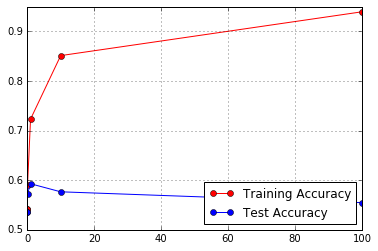

In [19]:
plt.plot(c_svm_rbf, acc_train_svm_rbf, 'ro-') 
plt.plot(c_svm_rbf, acc_test_svm_rbf,'bo-') 
plt.grid()

# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

In [32]:
for c in clist:
    svm_model(c,trainX,trainY,testX,testY,svm_kernel="poly") #Reduced inputs

kernel: poly
c:0.001000
	Train Accuracy = 0.54216
ding1
ding2
	Test Accuracy = 0.54679245283
kernel: poly
c:0.010000
	Train Accuracy = 0.5516
ding1
ding2
	Test Accuracy = 0.554905660377
kernel: poly
c:0.100000
	Train Accuracy = 0.60464
ding1
ding2
	Test Accuracy = 0.59320754717
kernel: poly
c:1.000000
	Train Accuracy = 0.66832
ding1
ding2
	Test Accuracy = 0.595660377358
kernel: poly
c:10.000000
	Train Accuracy = 0.69992
ding1
ding2
	Test Accuracy = 0.588113207547
kernel: poly
c:100.000000


KeyboardInterrupt: 

In [ ]:
for c in clist:
    svm_model(c,trainXpoly,trainY,testXpoly,testY,svm_kernel="rbf")

kernel: rbf
c:0.001000


In [27]:
acc_train_svm_poly = [0.546,0.5628,0.6072,0.7416,0.8884,0.976]
acc_test_svm_poly = [0.5248,0.534,0.5356,0.538,0.5292,0.5256]
c_svm_poly = [0.001,0.01,0.1,1.0,10.0,100.0]

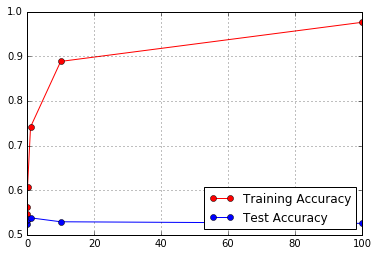

In [28]:
plt.plot(c_svm_poly, acc_train_svm_poly, 'ro-') 
plt.plot(c_svm_poly, acc_test_svm_poly,'bo-') 
plt.grid()

# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

Neural Networks

In [39]:
# Variations:
# hidden layers (use 1,2 and 3)
# hidden layer nodes (use 10,20 and 5)
# activation function (use sigmoid, ReLU, tanh)

def f(z):
    return 1 / (1 + np.exp(-z))


def f_deriv(z):
    return f(z) * (1 - f(z))

def f2(z):
    if z>0:
        return z
    else:
        return 0
    
def f2_deriv(z):
    if z>0:
        return 1
    else:
        return 0
    
def f3(z):
    return (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))

def f3_deriv(z):
    return 1-(f3(z))^2

In [45]:
def setup_and_init_weights(nn_structure):
    W = {} #creating a dictionary i.e. a set of key: value pairs
    b = {}
    for l in range(1, len(nn_structure)):
        W[l] = r.random_sample((nn_structure[l], nn_structure[l-1])) #Return “continuous uniform” random floats in the half-open interval [0.0, 1.0). 
        b[l] = r.random_sample((nn_structure[l],))
    return W, b

def init_tri_values(nn_structure):
    tri_W = {}
    tri_b = {}
    for l in range(1, len(nn_structure)):
        tri_W[l] = np.zeros((nn_structure[l], nn_structure[l-1]))
        tri_b[l] = np.zeros((nn_structure[l],))
    return tri_W, tri_b

def feed_forward(x, W, b, act_func=1):
    a = {1: x}
    z = {}
    for l in range(1, len(W) + 1):
        node_in = a[l]
        #print("\n",W[l],"\n",node_in,"\n",b[l])
        z[l+1] = W[l].dot(node_in) + b[l]
        if act_func==1:
            a[l+1] = f(z[l+1])
        elif act_func == 2:
            a[l+1] = f2(z[l+1])
        elif act_func == 3:
            a[l+1] = f3(z[l+1])
        
    return a, z

def calculate_out_layer_delta(y, a_out, z_out,act_func=1):
    if act_func==1:
        return -(y-a_out) * f_deriv(z_out)
    elif act_func==2:
        return -(y-a_out) * f2_deriv(z_out)
    elif act_func==3:
        return -(y-a_out) * f3_deriv(z_out)


def calculate_hidden_delta(delta_plus_1, w_l, z_l, act_func=1):
    if act_func==1:
        return np.dot(np.transpose(w_l), delta_plus_1) * f_deriv(z_l)
    elif act_func==2:
        return np.dot(np.transpose(w_l), delta_plus_1) * f2_deriv(z_l)
    elif act_func==3:
        return np.dot(np.transpose(w_l), delta_plus_1) * f3_deriv(z_l)

def train_nn(nn_structure, X, y, iter_num=3000, alpha=0.25, act_func=1):
    W, b = setup_and_init_weights(nn_structure)
    cnt = 0
    N = len(y)
    avg_cost_func = []
    print('Starting gradient descent for {} iterations'.format(iter_num))
    while cnt < iter_num:
        if cnt%1000 == 0:
            print('Iteration {} of {}'.format(cnt, iter_num))
        tri_W, tri_b = init_tri_values(nn_structure)
        avg_cost = 0
        for i in range(N):
            delta = {}
            a, z = feed_forward(X[i, :], W, b,act_func)
            for l in range(len(nn_structure), 0, -1):
                if l == len(nn_structure):
                    
                    delta[l] = calculate_out_layer_delta(y[i,:], a[l], z[l],act_func)
                    avg_cost += np.linalg.norm((y[i,:]-a[l]))
                else:
                    if l > 1:
                        delta[l] = calculate_hidden_delta(delta[l+1], W[l], z[l],act_func)
                    #print(type(tri_W))
                    tri_W[l] = tri_W[l] + np.dot(delta[l+1][:,np.newaxis], np.transpose(a[l][:,np.newaxis]))
                    tri_b[l] = tri_b[l] + delta[l+1]
        for l in range(len(nn_structure) - 1, 0, -1):
            W[l] = W[l] + -alpha * (1.0/N * tri_W[l])
            b[l] = b[l] + -alpha * (1.0/N * tri_b[l])
        avg_cost = 1.0/N * avg_cost
        avg_cost_func.append(avg_cost)
        cnt += 1
    return W, b, avg_cost_func


def predict_y(W, b, X, n_layers):
    N = X.shape[0]
    y = np.zeros((N,))
    for i in range(N):
        a, z = feed_forward(X[i, :], W, b)
        y[i] = np.argmax(a[n_layers])
    return y

In [41]:
nn_structure1 = [24, 10, 1]
nn_structure2 = [24, 20, 1]
nn_structure3 = [24, 5, 1]

nn_structure4 = [24, 10, 10, 1]
nn_structure5 = [24, 10, 10, 10, 1]

In [42]:
trainYvec=trainY.reshape((trainY.shape[0],1))
testYvec=testY.reshape((testY.shape[0],1))

In [14]:
print(X[0:20])

[[11.0 1.0 41.0 0.0 1.0 0.0 0.0 0.0 1.0 0 0 0 0 0 0 1.0 0.0 0.0 0.0 1.0 0.0
  1.0 0.0 0.0]
 [12.0 3.0 59.0 0.0 18.0 0.0 0.0 0.0 9.0 0 0 0 3 1 1 1.0 0.0 0.0 0.0 1.0
  0.0 1.0 0.0 0.0]
 [13.0 2.0 11.0 5.0 13.0 2.0 0.0 1.0 6.0 0 0 2 0 0 1 0.0 0.0 0.0 1.0 1.0
  0.0 0.0 0.0 0.0]
 [14.0 2.0 44.0 1.0 16.0 0.0 0.0 0.0 7.0 0 0 0 3 1 1 1.0 0.0 0.0 0.0 0.0
  1.0 0.0 1.0 0.0]
 [14.5 1.0 51.0 0.0 8.0 0.0 0.0 0.0 5.0 0 0 2 2 1 1 1.0 0.0 0.0 0.0 0.0 1.0
  0.0 1.0 0.0]
 [15.0 3.0 31.0 6.0 16.0 0.0 0.0 0.0 9.0 0 0 0 2 0 1 1.0 0.0 0.0 0.0 0.0
  1.0 1.0 0.0 0.0]
 [15.5 4.0 70.0 1.0 21.0 0.0 0.0 0.0 7.0 0 2 0 2 1 1 1.0 0.0 0.0 0.0 0.0
  1.0 1.0 0.0 0.0]
 [16.0 5.0 73.0 0.0 12.0 0.0 0.0 0.0 8.0 0 0 0 0 0 1 1.0 0.0 0.0 0.0 0.0
  1.0 1.0 0.0 0.0]
 [16.5 13.0 68.0 2.0 28.0 0.0 0.0 0.0 8.0 0 0 2 2 1 1 1.0 0.0 0.0 0.0 1.0
  0.0 1.0 0.0 0.0]
 [17.0 12.0 33.0 3.0 18.0 0.0 0.0 0.0 8.0 0 0 0 2 1 1 1.0 0.0 0.0 0.0 1.0
  0.0 1.0 0.0 0.0]
 [14.5 9.0 47.0 2.0 17.0 0.0 0.0 0.0 9.0 0 0 0 2 0 1 0.0 0.0 0.0 1.0 1.0
  0.0 1

# v HERE!!!!

In [ ]:
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
np.random.seed(0)
model_1=Sequential()
model_2=Sequential()
model_3=Sequential()
model_4=Sequential()
model_5=Sequential()
model_6=Sequential()
model_7=Sequential()

model_1.add(Dense(len(trainX[0]),input_dim=len(trainX[0]),activation='sigmoid'))
model_1.add(Dense(10,activation='sigmoid'))
model_1.add(Dense(1,activation='sigmoid'))

model_2.add(Dense(len(trainX[0]),input_dim=len(trainX[0]),activation='relu'))
model_2.add(Dense(10,activation='relu'))
model_2.add(Dense(1,activation='relu'))

model_3.add(Dense(len(trainX[0]),input_dim=len(trainX[0]),activation='tanh'))
model_3.add(Dense(10,activation='tanh'))
model_3.add(Dense(1,activation='tanh'))

model_4.add(Dense(len(trainX[0]),input_dim=len(trainX[0]),activation='tanh'))
model_4.add(Dense(5,activation='sigmoid'))
model_4.add(Dense(1,activation='sigmoid'))

model_5.add(Dense(len(trainX[0]),input_dim=len(trainX[0]),activation='tanh'))
model_5.add(Dense(20,activation='sigmoid'))
model_5.add(Dense(1,activation='sigmoid'))

model_6.add(Dense(len(trainX[0]),input_dim=len(trainX[0]),activation='sigmoid'))
model_6.add(Dense(10,activation='sigmoid'))
model_6.add(Dense(10,activation='sigmoid'))
model_6.add(Dense(1,activation='sigmoid'))

model_7.add(Dense(len(trainX[0]),input_dim=len(trainX[0]),activation='sigmoid'))
model_7.add(Dense(10,activation='sigmoid'))
model_7.add(Dense(10,activation='sigmoid'))
model_7.add(Dense(10,activation='sigmoid'))
model_7.add(Dense(1,activation='sigmoid'))

In [ ]:
model_1.compile(loss='mse',optimizer='rmsprop',metrics=['accuracy',f1])
history = model_1.fit(X, Y, epochs=1500, batch_size=4603)
scores = model_1.evaluate(X, Y)
print("\n%s: %.2f%%" % (model_1.metrics_names[1], scores[1]*100))

In [ ]:
model_2.compile(loss='mse',optimizer='rmsprop',metrics=['accuracy',f1])
history = model_2.fit(X, Y, epochs=1500, batch_size=4603)
scores = model_2.evaluate(X, Y)
print("\n%s: %.2f%%" % (model_2.metrics_names[1], scores[1]*100))

In [ ]:
model_3.compile(loss='mse',optimizer='rmsprop',metrics=['accuracy',f1])
history = model_3.fit(X, Y, epochs=1500, batch_size=4603)
scores = model_3.evaluate(X, Y)
print("\n%s: %.2f%%" % (model_3.metrics_names[1], scores[1]*100))

In [ ]:
model_4.compile(loss='mse',optimizer='rmsprop',metrics=['accuracy',f1])
history = model_4.fit(X, Y, epochs=1500, batch_size=4603)
scores = model_4.evaluate(X, Y)
print("\n%s: %.2f%%" % (model_4.metrics_names[1], scores[1]*100))

In [ ]:
model_5.compile(loss='mse',optimizer='rmsprop',metrics=['accuracy',f1])
history = model_5.fit(X, Y, epochs=1500, batch_size=4603)
scores = model_5.evaluate(X, Y)
print("\n%s: %.2f%%" % (model_5.metrics_names[1], scores[1]*100))

In [ ]:
model_6.compile(loss='mse',optimizer='rmsprop',metrics=['accuracy',f1])
history = model_6.fit(X, Y, epochs=1500, batch_size=4603)
scores = model_6.evaluate(X, Y)
print("\n%s: %.2f%%" % (model_6.metrics_names[1], scores[1]*100))

In [ ]:
model_7.compile(loss='mse',optimizer='rmsprop',metrics=['accuracy',f1])
history = model_7.fit(X, Y, epochs=1500, batch_size=4603)
scores = model_7.evaluate(X, Y)
print("\n%s: %.2f%%" % (model_7.metrics_names[1], scores[1]*100))

# ^ UNTIL HERE!!! (set epochs and batch size)

In [46]:
W_1, b_1, avg_cost_func_1 = train_nn(nn_structure1, trainX, trainYvec, 3000,act_func=1)

Starting gradient descent for 3000 iterations
Iteration 0 of 3000


KeyboardInterrupt: 

In [ ]:
W_2, b_2, avg_cost_func_2 = train_nn(nn_structure1, trainX, trainYvec, 3000,act_func=2)

In [ ]:
W_3, b_3, avg_cost_func_3 = train_nn(nn_structure1, trainX, trainYvec, 3000,act_func=3)

In [ ]:
W_4, b_4, avg_cost_func_4 = train_nn(nn_structure2, trainX, trainYvec, 3000,act_func=1)

In [ ]:
W_5, b_5, avg_cost_func_5 = train_nn(nn_structure3, trainX, trainYvec, 3000,act_func=1)

In [ ]:
W_6, b_6, avg_cost_func_6 = train_nn(nn_structure4, trainX, trainYvec, 3000,act_func=1)

In [ ]:
W_7, b_7, avg_cost_func_7 = train_nn(nn_structure5, trainX, trainYvec, 3000,act_func=1)

In [ ]:
plt.plot(avg_cost_func_1)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()

predY = predict_y(W_1, b_1, testX, 3)
print('Prediction accuracy is {}%'.format(accuracy_score(testYvec, predY) * 100))

In [ ]:
plt.plot(avg_cost_func_2)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()

predY = predict_y(W_2, b_2, testX, 3)
print('Prediction accuracy is {}%'.format(accuracy_score(testYvec, predY) * 100))

In [ ]:
plt.plot(avg_cost_func_3)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()

predY = predict_y(W_3, b_3, testX, 3)
print('Prediction accuracy is {}%'.format(accuracy_score(testYvec, predY) * 100))

In [ ]:
plt.plot(avg_cost_func_4)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()

predY = predict_y(W_4, b_4, testX, 3)
print('Prediction accuracy is {}%'.format(accuracy_score(testYvec, predY) * 100))

In [ ]:
plt.plot(avg_cost_func_5)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()

predY = predict_y(W_5, b_5, testX, 3)
print('Prediction accuracy is {}%'.format(accuracy_score(testYvec, predY) * 100))

In [ ]:
plt.plot(avg_cost_func_6)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()

predY = predict_y(W_6, b_6, testX, 3)
print('Prediction accuracy is {}%'.format(accuracy_score(testYvec, predY) * 100))

In [ ]:
plt.plot(avg_cost_func_7)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()

predY = predict_y(W_7, b_7, testX, 3)
print('Prediction accuracy is {}%'.format(accuracy_score(testYvec, predY) * 100))